In [24]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style = 'white', )

# FUNCION TO BE USED

In [25]:
def plot_continuous(data, catagory, plot_lm = False):
    '''
    data: a pandas datafeame
    catagory: the catagory to plotted as a string
    plot_lm: boolan (for a linear lm plot) 
    '''
    fig = plt.figure(figsize = (10,8))
    axis = sns.kdeplot(data.loc[data['salary'] == 1, catagory], color = 'g', shade = True, label = 'High income')
    axis = sns.kdeplot(data.loc[data['salary'] == 0, catagory], color = 'b', shade = True, label = 'Low income')
    plt.title(f'{catagory} Distribution : High vs Low income')
    plt.ylabel('Frequency')
    plt.xlabel(f'{catagory}')

    if plot_lm:
        sns.lmplot(catagory, 'salary', data)

def plot_categorical(data, catagory, plot = 'count'):
    '''
    data: a pandas datafeame
    catagory: the catagory to plotted as a string
    plot: 'count' or 'probability' 
    '''

    if plot == 'count':
        ax = sns.countplot(x = catagory, hue = 'salary', data = data)
        count_data = data[[catagory, 'salary']].groupby([catagory]).count().sort_values(by = 'salary', ascending = False)
        print(count_data)

    elif plot == 'probability':

        size = len(data[catagory].unique())
        g = sns.factorplot(x =catagory, y = 'salary', data = data, kind = 'bar', size = size, palette = 'muted')
        g.set_ylabels('Salary Probability')
        g.set_xlabels(catagory)
        probability_data = data[[catagory, 'salary']].groupby([catagory]).mean().sort_values(by = 'salary', ascending = False)
        print(probability_data)





In [26]:
# Giving apropriate anmes to the columns

income_data = pd.read_csv('adult.data', header = None)

columns = ['age', 'workclass', 'fnlwgt', 'education', 'edu_num', 'marital_status', 'occupation', 'relatiionship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_worked', 'native_country', 'salary']

income_data.columns = columns
income_data.head()

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relatiionship,race,sex,capital_gain,capital_loss,hours_worked,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
income_test_data = pd.read_csv('adult.test', header = None)

income_test_data.columns = columns
income_test_data.head()


,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relatiionship,race,sex,capital_gain,capital_loss,hours_worked,native_country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [28]:
# Replacing ' ?' with NaN values

income_data = income_data.replace(' ?', np.nan)
income_test_data = income_test_data.replace(' ?', np.nan)

In [29]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   edu_num         32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relatiionship   32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_worked    32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [30]:
income_data.describe()

,age,fnlwgt,edu_num,capital_gain,capital_loss,hours_worked
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [31]:
len(income_data)

32561

In [32]:
#Analysing non- null values
train_null = (income_data.isnull().sum() / len(income_data))
train_null = train_null[train_null[train_null > 0].index].sort_values(ascending = False)
train_null.head()


occupation        0.056601
workclass         0.056386
native_country    0.017905
dtype: float64

In [33]:
# converting target to zero and ones
income_data['salary'] = income_data['salary'].replace([' <=50K', ' >50K'], [0, 1])
income_test_data['salary'] = income_test_data['salary'].replace([' <=50K.', ' >50K.'], [0, 1])


income_test_data['salary'].unique()

array([0, 1], dtype=int64)

In [34]:
income_test_data['salary'].unique()

array([0, 1], dtype=int64)

# FEATURE ANALYSIS


## 1. AGE

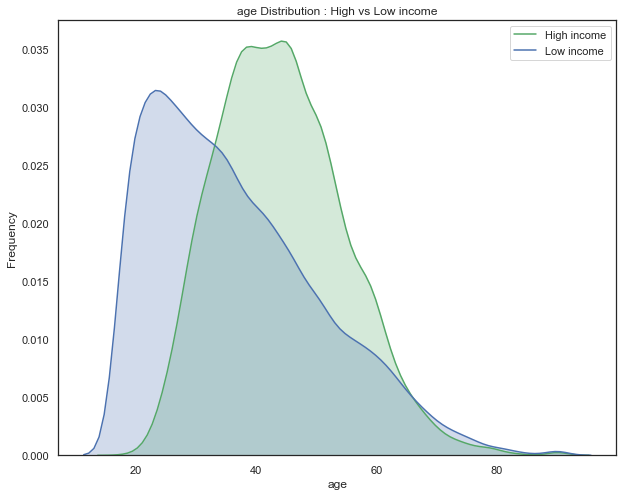

In [35]:
# Train data
plot_continuous(income_data, 'age')

## 2. fnlwgt

This feature does not seen to have much predictive power. So it can be dropped later

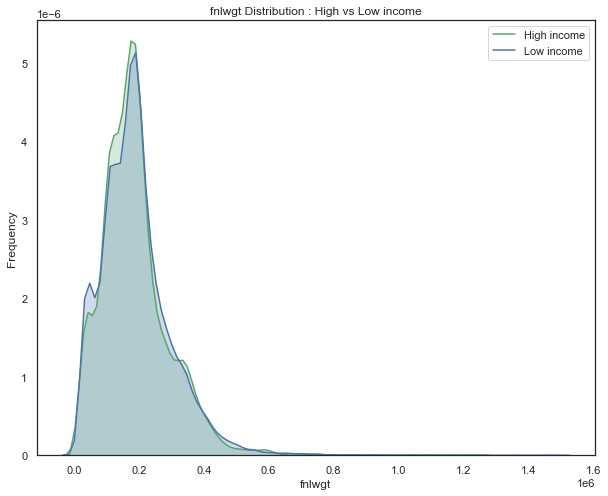

In [36]:
# train data
plot_continuous(income_data, 'fnlwgt')

## 3. edu_num

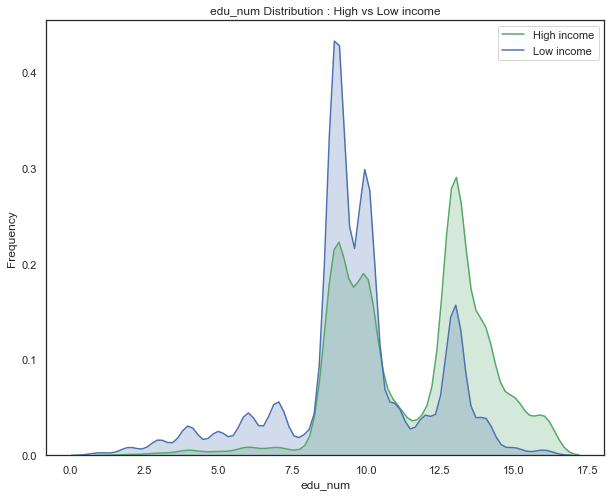

In [37]:
# train data
plot_continuous(income_data, 'edu_num')

## 4. capital_gain

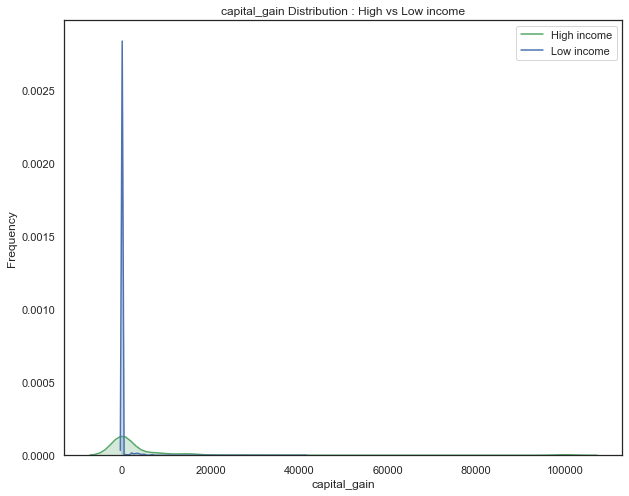

In [38]:
# train data
plot_continuous(income_data, 'capital_gain')

## 5. capital_loss

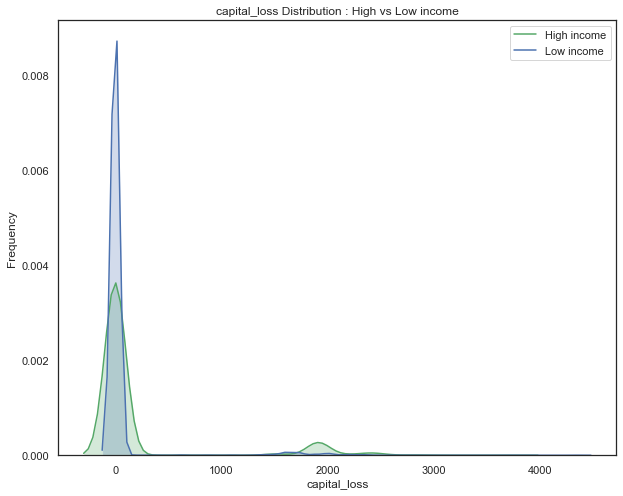

In [39]:
# train data
plot_continuous(income_data, 'capital_loss')

## 6. hours_worked

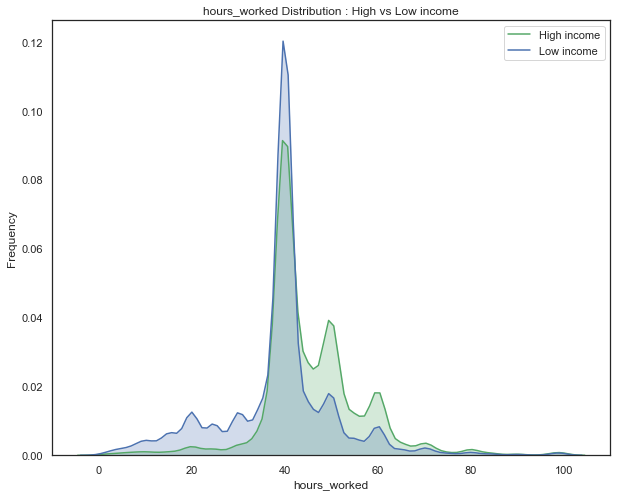

In [40]:
# train data
plot_continuous(income_data, 'hours_worked')

In [41]:
## 7. workclass

salary
workclass                
 Private            22696
 Self-emp-not-inc    2541
 Local-gov           2093
 State-gov           1298
 Self-emp-inc        1116
 Federal-gov          960
 Without-pay           14
 Never-worked           7


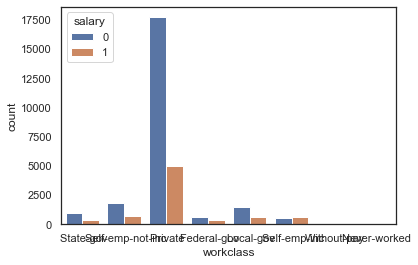

In [42]:
# Plot count for catagorical features

plot_categorical(income_data, 'workclass', plot = 'count')

salary
workclass                  
 Self-emp-inc      0.557348
 Federal-gov       0.386458
 Local-gov         0.294792
 Self-emp-not-inc  0.284927
 State-gov         0.271957
 Private           0.218673
 Never-worked      0.000000
 Without-pay       0.000000


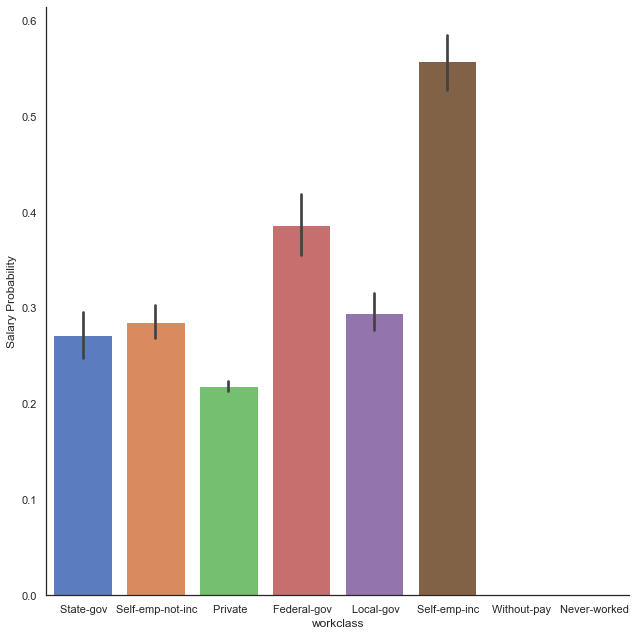

In [43]:
# Plot probability power of catagorical features

plot_categorical(income_data, 'workclass', plot='probability')

## 8. education

salary
education            
 HS-grad        10501
 Some-college    7291
 Bachelors       5355
 Masters         1723
 Assoc-voc       1382
 11th            1175
 Assoc-acdm      1067
 10th             933
 7th-8th          646
 Prof-school      576
 9th              514
 12th             433
 Doctorate        413
 5th-6th          333
 1st-4th          168
 Preschool         51


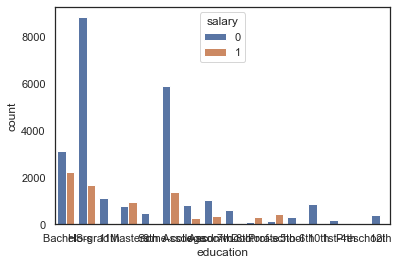

In [44]:
# Plot count for catagorical features

plot_categorical(income_data, 'education', plot = 'count')

salary
education              
 Doctorate     0.740920
 Prof-school   0.734375
 Masters       0.556587
 Bachelors     0.414753
 Assoc-voc     0.261216
 Assoc-acdm    0.248360
 Some-college  0.190235
 HS-grad       0.159509
 12th          0.076212
 10th          0.066452
 7th-8th       0.061920
 9th           0.052529
 11th          0.051064
 5th-6th       0.048048
 1st-4th       0.035714
 Preschool     0.000000


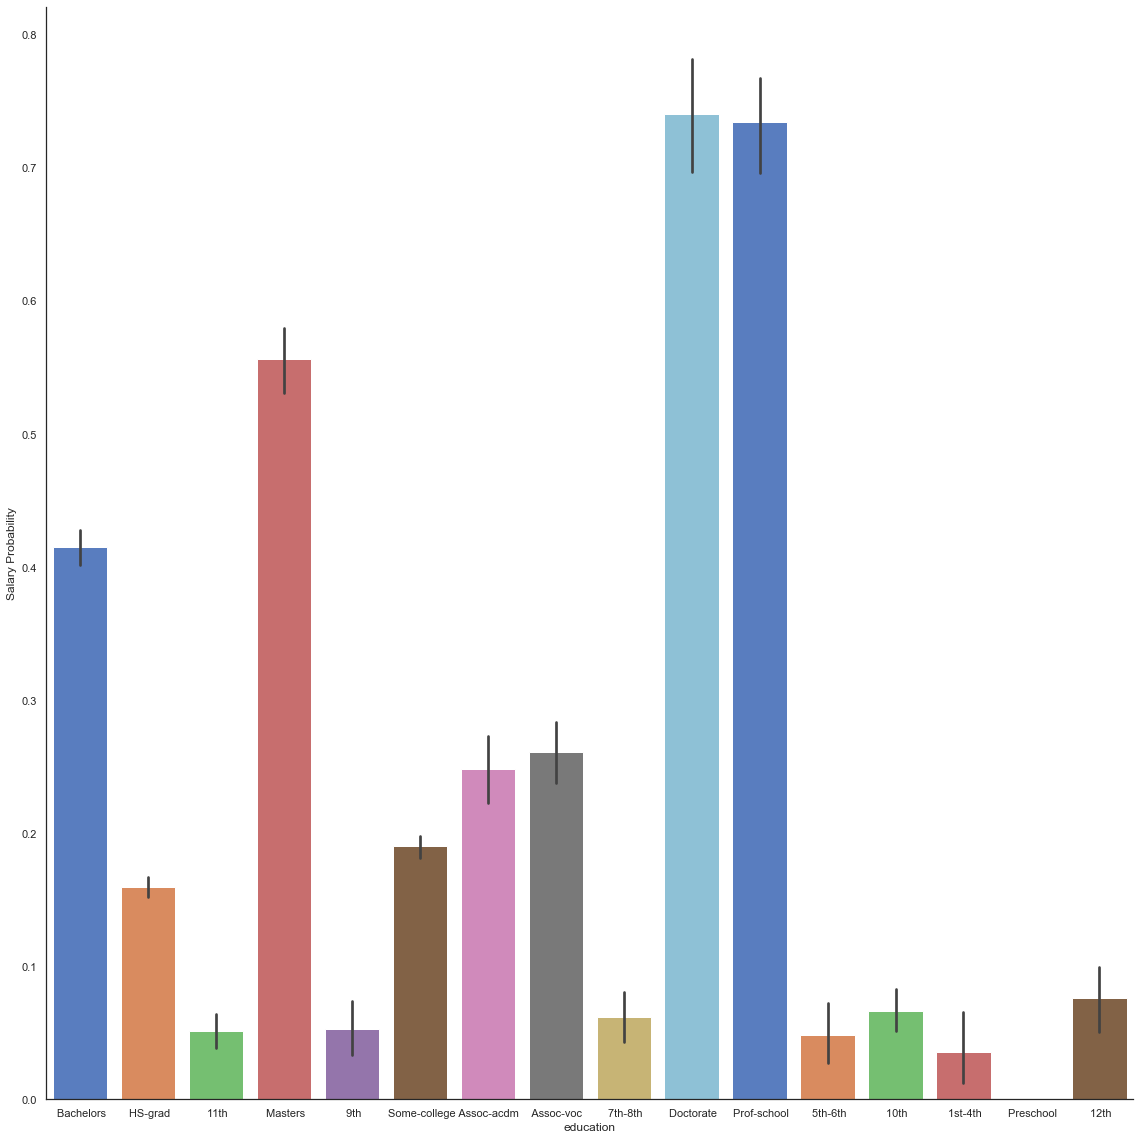

In [45]:
# Plot probability power of catagorical features

plot_categorical(income_data, 'education', plot='probability')

## 9. marital_status

salary
marital_status                
 Married-civ-spouse      14976
 Never-married           10683
 Divorced                 4443
 Separated                1025
 Widowed                   993
 Married-spouse-absent     418
 Married-AF-spouse          23


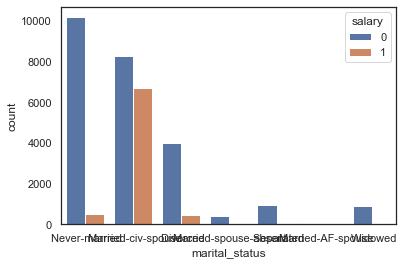

In [46]:
# Plot count for catagorical features

plot_categorical(income_data, 'marital_status', plot = 'count')

salary
marital_status                  
 Married-civ-spouse     0.446848
 Married-AF-spouse      0.434783
 Divorced               0.104209
 Widowed                0.085599
 Married-spouse-absent  0.081340
 Separated              0.064390
 Never-married          0.045961


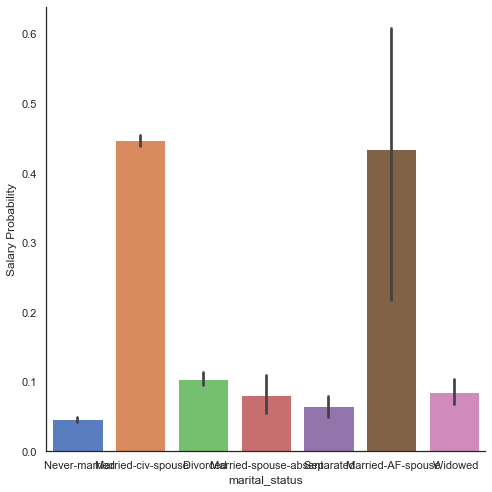

In [47]:
# Plot probability power of catagorical features

plot_categorical(income_data, 'marital_status', plot='probability')

## 10. occupation

salary
occupation                
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9


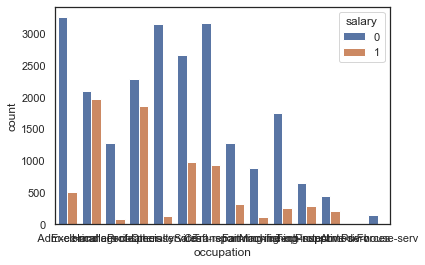

In [48]:
# Plot count for catagorical features

plot_categorical(income_data, 'occupation', plot = 'count')

salary
occupation                  
 Exec-managerial    0.484014
 Prof-specialty     0.449034
 Protective-serv    0.325116
 Tech-support       0.304957
 Sales              0.269315
 Craft-repair       0.226641
 Transport-moving   0.200376
 Adm-clerical       0.134483
 Machine-op-inspct  0.124875
 Farming-fishing    0.115694
 Armed-Forces       0.111111
 Handlers-cleaners  0.062774
 Other-service      0.041578
 Priv-house-serv    0.006711


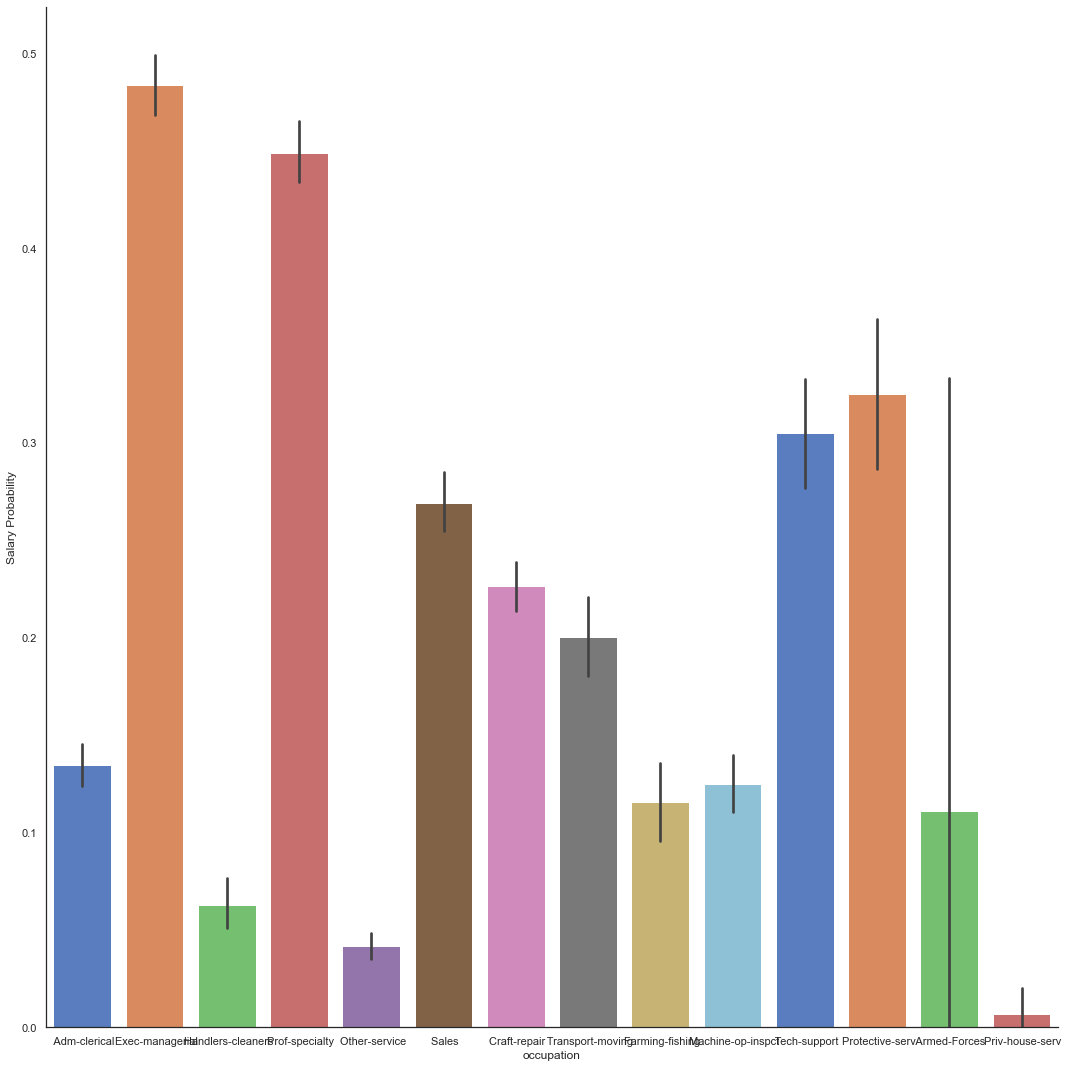

In [49]:
# Plot probability power of catagorical features

plot_categorical(income_data, 'occupation', plot='probability')

## 11. relatiionship

salary
relatiionship          
 Husband          13193
 Not-in-family     8305
 Own-child         5068
 Unmarried         3446
 Wife              1568
 Other-relative     981


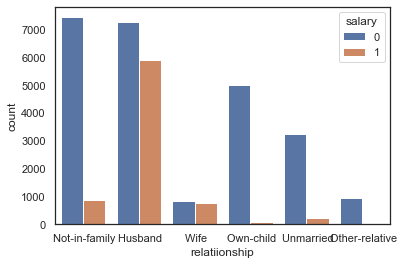

In [50]:
# Plot count for catagorical features

plot_categorical(income_data, 'relatiionship', plot = 'count')

salary
relatiionship            
 Wife            0.475128
 Husband         0.448571
 Not-in-family   0.103070
 Unmarried       0.063262
 Other-relative  0.037717
 Own-child       0.013220


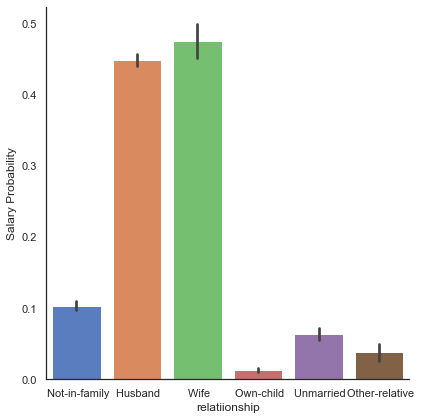

In [51]:
# Plot probability power of catagorical features

plot_categorical(income_data, 'relatiionship', plot='probability')

## 12. race

salary
race                       
 White                27816
 Black                 3124
 Asian-Pac-Islander    1039
 Amer-Indian-Eskimo     311
 Other                  271


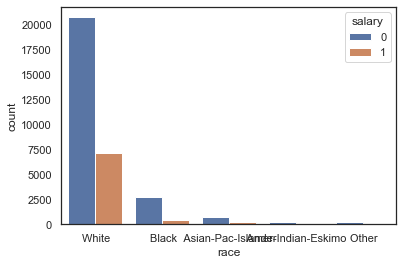

In [52]:
# Plot count for catagorical features

plot_categorical(income_data, 'race', plot = 'count')

salary
race                         
 Asian-Pac-Islander  0.265640
 White               0.255860
 Black               0.123880
 Amer-Indian-Eskimo  0.115756
 Other               0.092251


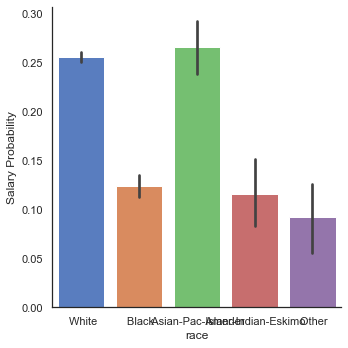

In [53]:
# Plot probability power of catagorical features

plot_categorical(income_data, 'race', plot='probability')

## 13. sex

salary
sex            
 Male     21790
 Female   10771


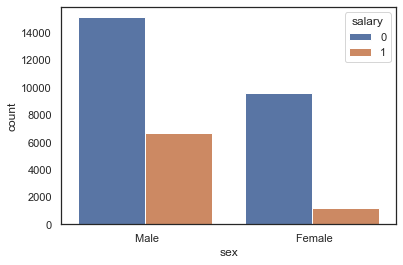

In [54]:
# Plot count for catagorical features

plot_categorical(income_data, 'sex', plot = 'count')

salary
sex              
 Male    0.305737
 Female  0.109461


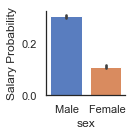

In [55]:
# Plot probability power of catagorical features

plot_categorical(income_data, 'sex', plot='probability')

## 14. native_country

salary
native_country                     
 United-States                29170
 Mexico                         643
 Philippines                    198
 Germany                        137
 Canada                         121
 Puerto-Rico                    114
 El-Salvador                    106
 India                          100
 Cuba                            95
 England                         90
 Jamaica                         81
 South                           80
 China                           75
 Italy                           73
 Dominican-Republic              70
 Vietnam                         67
 Guatemala                       64
 Japan                           62
 Poland                          60
 Columbia                        59
 Taiwan                          51
 Haiti                           44
 Iran                            43
 Portugal                        37
 Nicaragua                       34
 Peru                            31
 Greece              

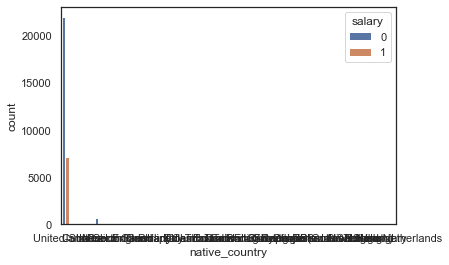

In [61]:
# Plot count for catagorical features

plot_categorical(income_data, 'native_country', plot = 'count')

salary
native_country                       
 Iran                        0.418605
 France                      0.413793
 India                       0.400000
 Taiwan                      0.392157
 Japan                       0.387097
 Yugoslavia                  0.375000
 Cambodia                    0.368421
 Italy                       0.342466
 England                     0.333333
 Canada                      0.322314
 Germany                     0.321168
 Philippines                 0.308081
 Hong                        0.300000
 Greece                      0.275862
 China                       0.266667
 Cuba                        0.263158
 Scotland                    0.250000
 United-States               0.245835
 Hungary                     0.230769
 Ireland                     0.208333
 South                       0.200000
 Poland                      0.200000
 Thailand                    0.166667
 Ecuador                     0.142857
 Jamaica                     0.123457
 Laos

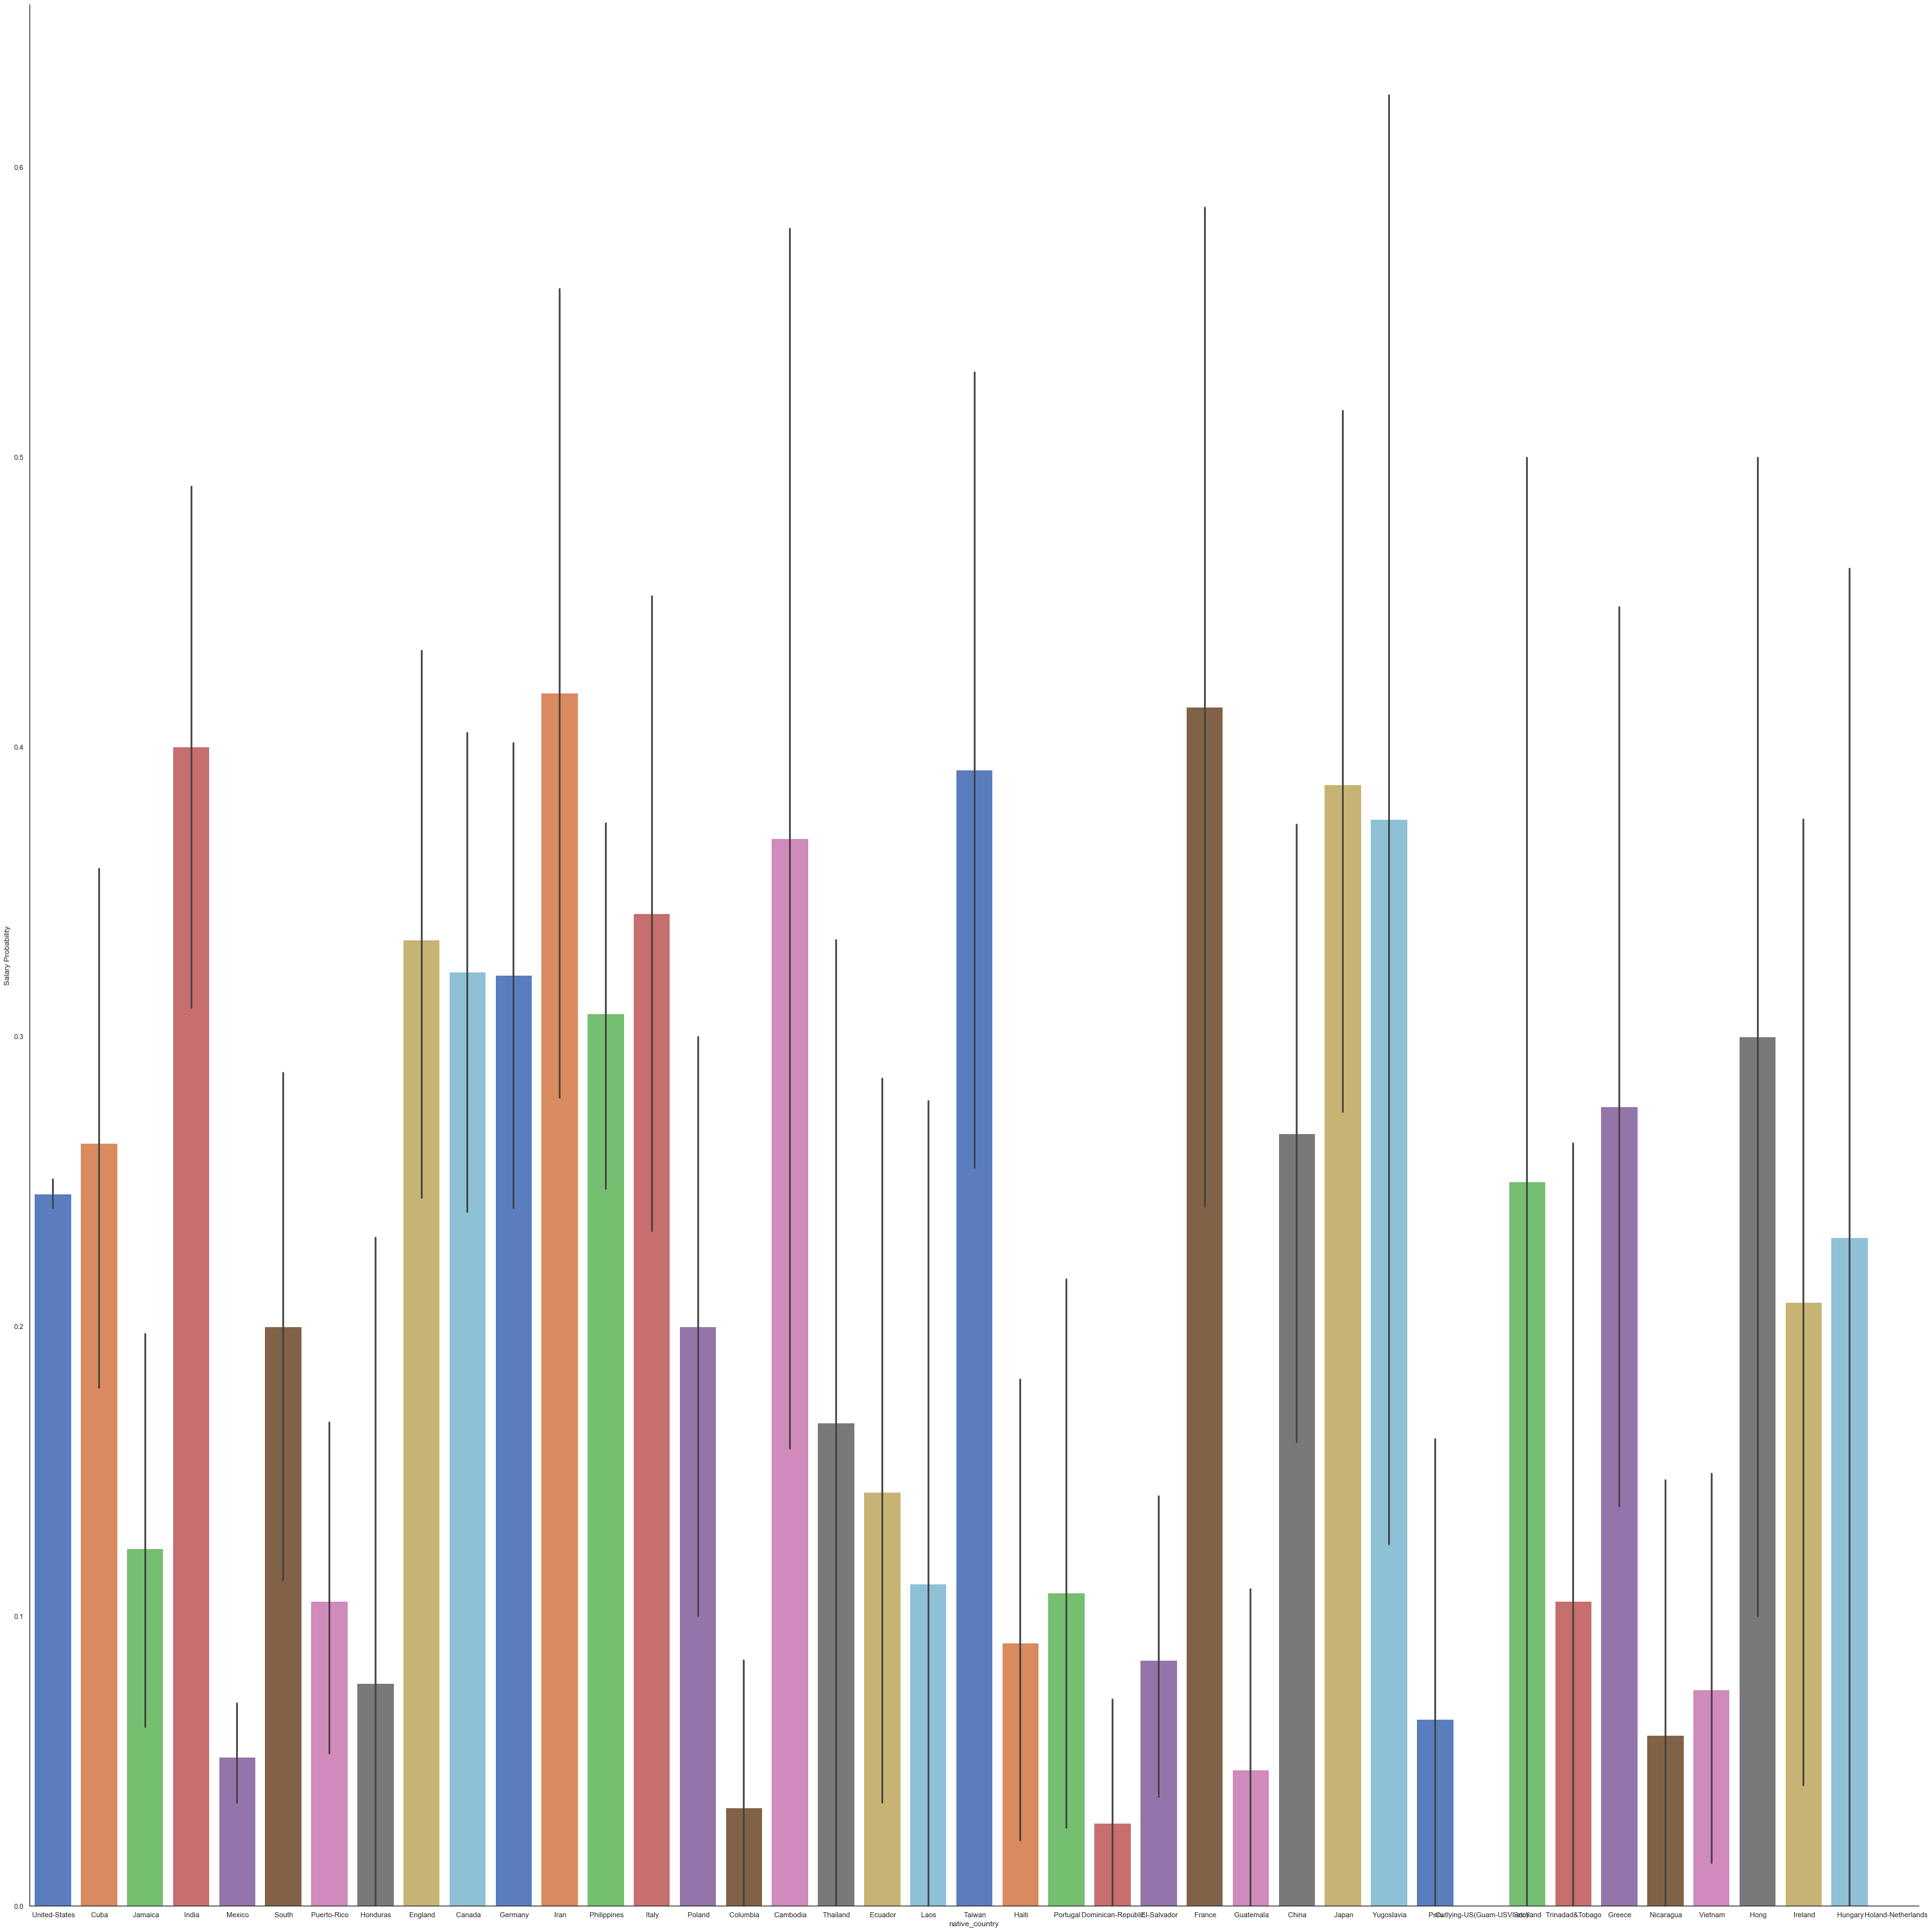

In [57]:
# Plot probability power of catagorical features

plot_categorical(income_data, 'native_country', plot='probability')

In [58]:
income_data.head()

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relatiionship,race,sex,capital_gain,capital_loss,hours_worked,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [59]:
income_test_data.head()

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relatiionship,race,sex,capital_gain,capital_loss,hours_worked,native_country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
